# Introduction

The National Longitudinal Survey of Youth 1997-2011 dataset is one of the most important databases available to social scientists working with US data. 

It allows scientists to look at the determinants of earnings as well as educational attainment and has incredible relevance for government policy. It can also shed light on politically sensitive issues like how different educational attainment and salaries are for people of different ethnicity, sex, and other factors. When we have a better understanding how these variables affect education and earnings we can also formulate more suitable government policies. 

<center><img src=https://i.imgur.com/cxBpQ3I.png height=400></center>


### Upgrade Plotly

In [ ]:
pip install plotly==4.5.2

     |████████████████████████████████| 7.1MB 8.4MB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


###  Import Statements


In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Notebook Presentation

In [2]:
pd.options.display.float_format = "{:,.2f}".format

# Load the Data



In [3]:
df_data = pd.read_csv(filepath_or_buffer="NLSY97_subset.csv")

### Understand the Dataset

Have a look at the file entitled `NLSY97_Variable_Names_and_Descriptions.csv`. 

---------------------------

    :Key Variables:  
      1. S           Years of schooling (highest grade completed as of 2011)
      2. EXP         Total out-of-school work experience (years) as of the 2011 interview.
      3. EARNINGS    Current hourly earnings in $ reported at the 2011 interview

In [5]:
df_var = pd.read_csv(filepath_or_buffer="NLSY97_Variable_Names_and_Descriptions.csv")

In [6]:
df_var.tail()

,Personal variables,Variable Type,Description
117,URBAN,D,Living in an urban area
118,REGNE,D,Census region North east
119,REGNC,D,Census region North central
120,REGW,D,Census region West
121,REGS,D,Census region South


# Preliminary Data Exploration 🔎

**Challenge**

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [7]:
print(f"The 'NLSY97_subset' DataFrame has {df_data.shape[0]} rows and {df_data.shape[1]} columns")

The 'NLSY97_subset' DataFrame has 2000 rows and 96 columns


In [8]:
df_data.columns

Index(['ID', 'EARNINGS', 'S', 'EXP', 'FEMALE', 'MALE', 'BYEAR', 'AGE',
       'AGEMBTH', 'HHINC97', 'POVRAT97', 'HHBMBF', 'HHBMOF', 'HHOMBF',
       'HHBMONLY', 'HHBFONLY', 'HHOTHER', 'MSA97NO', 'MSA97NCC', 'MSA97CC',
       'MSA97NK', 'ETHBLACK', 'ETHHISP', 'ETHWHITE', 'EDUCPROF', 'EDUCPHD',
       'EDUCMAST', 'EDUCBA', 'EDUCAA', 'EDUCHSD', 'EDUCGED', 'EDUCDO',
       'PRMONM', 'PRMONF', 'PRMSTYUN', 'PRMSTYPE', 'PRMSTYAN', 'PRMSTYAE',
       'PRFSTYUN', 'PRFSTYPE', 'PRFSTYAN', 'PRFSTYAE', 'SINGLE', 'MARRIED',
       'COHABIT', 'OTHSING', 'FAITHN', 'FAITHP', 'FAITHC', 'FAITHJ', 'FAITHO',
       'FAITHM', 'ASVABAR', 'ASVABWK', 'ASVABPC', 'ASVABMK', 'ASVABNO',
       'ASVABCS', 'ASVABC', 'ASVABC4', 'VERBAL', 'ASVABMV', 'HEIGHT',
       'WEIGHT04', 'WEIGHT11', 'SF', 'SM', 'SFR', 'SMR', 'SIBLINGS', 'REG97NE',
       'REG97NC', 'REG97S', 'REG97W', 'RS97RURL', 'RS97URBN', 'RS97UNKN',
       'JOBS', 'HOURS', 'TENURE', 'CATGOV', 'CATPRI', 'CATNPO', 'CATMIS',
       'CATSE', 'COLLBARG', 'URBAN'

In [ ]:
df_data.head()

,ID,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,POVRAT97,HHBMBF,HHBMOF,HHOMBF,HHBMONLY,HHBFONLY,HHOTHER,MSA97NO,MSA97NCC,MSA97CC,MSA97NK,ETHBLACK,ETHHISP,ETHWHITE,EDUCPROF,EDUCPHD,EDUCMAST,EDUCBA,EDUCAA,EDUCHSD,EDUCGED,EDUCDO,PRMONM,PRMONF,PRMSTYUN,PRMSTYPE,PRMSTYAN,PRMSTYAE,PRFSTYUN,PRFSTYPE,...,ASVABNO,ASVABCS,ASVABC,ASVABC4,VERBAL,ASVABMV,HEIGHT,WEIGHT04,WEIGHT11,SF,SM,SFR,SMR,SIBLINGS,REG97NE,REG97NC,REG97S,REG97W,RS97RURL,RS97URBN,RS97UNKN,JOBS,HOURS,TENURE,CATGOV,CATPRI,CATNPO,CATMIS,CATSE,COLLBARG,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
0,4275,18.50,12,9.71,0,1,1984,27,24.00,"64,000.00",402.00,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,14.00,14.00,0.00,0.00,0.00,1.00,0.00,0.00,...,-0.36,-0.72,-0.21,-0.32,-0.53,29818,70,155,186,12,12,12.00,12.00,1,0,0,1,0,0,1,0,6.00,50,4.77,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0
1,4328,19.23,17,5.71,0,1,1982,29,32.00,"6,000.00",38.00,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,12.00,12.00,0.00,0.00,0.00,1.00,0.00,0.00,...,-1.21,-0.17,0.13,-0.14,-0.21,46246,74,200,200,16,12,16.00,12.00,3,0,0,1,0,0,1,0,nan,50,9.06,0,0,0,1,0,0,2,0,0,1,0,0,1,0,0,0
2,8763,39.05,14,9.94,0,1,1981,30,23.00,"88,252.00",555.00,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,nan,nan,nan,nan,nan,nan,nan,nan,...,0.06,-0.07,0.51,0.48,0.54,66480,72,168,190,16,6,nan,6.00,1,0,0,0,1,0,1,0,3.00,65,4.98,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0
3,8879,16.80,18,1.54,0,1,1983,28,30.00,nan,nan,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,6.00,4.00,0.00,1.00,0.00,0.00,1.00,0.00,...,1.68,0.32,0.37,0.16,-0.05,51240,73,153,175,14,14,14.00,14.00,2,0,1,0,0,1,0,0,10.00,40,1.02,1,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0
4,1994,36.06,15,2.94,0,1,1984,27,23.00,"44,188.00",278.00,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,11.00,8.00,0.00,1.00,0.00,0.00,0.00,0.00,...,0.22,0.22,1.15,1.07,0.59,89773,71,145,170,14,16,14.00,16.00,1,0,0,0,1,0,1,0,7.00,40,2.35,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0


## Data Cleaning - Check for Missing Values and Duplicates

Find and remove any duplicate rows.

In [ ]:
print(f"Any NaN values? {df_data.isna().values.any()}")

Any NaN values? True


In [ ]:
print(f"{df_data.isna().values.sum()} cells contain NaN values")
print()

print(f"There are {len(df_data[df_data.isna().any(axis=1)])} rows with NaN values")

8559 cells contain NaN values

There are 1343 rows with NaN values


In [ ]:
df_data[df_data.columns[df_data.isna().any()]]  # columns with NaN values

,AGEMBTH,HHINC97,POVRAT97,PRMONM,PRMONF,PRMSTYUN,PRMSTYPE,PRMSTYAN,PRMSTYAE,PRFSTYUN,PRFSTYPE,PRFSTYAN,PRFSTYAE,SFR,SMR,JOBS
0,24.00,"64,000.00",402.00,14.00,14.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,12.00,12.00,6.00
1,32.00,"6,000.00",38.00,12.00,12.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,16.00,12.00,nan
2,23.00,"88,252.00",555.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,6.00,3.00
3,30.00,nan,nan,6.00,4.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,14.00,14.00,10.00
4,23.00,"44,188.00",278.00,11.00,8.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,14.00,16.00,7.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,19.00,"6,000.00",38.00,0.00,nan,1.00,0.00,0.00,0.00,nan,nan,nan,nan,nan,12.00,3.00
1996,28.00,"50,000.00",314.00,9.00,3.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,12.00,12.00,9.00
1997,29.00,"77,610.00",488.00,12.00,nan,0.00,0.00,0.00,1.00,nan,nan,nan,nan,16.00,16.00,8.00
1998,23.00,"69,300.00",549.00,8.00,6.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,12.00,17.00,7.00


In [132]:
# creating a subset dataframe of only key variables
df_sub = df_data[["ID", "EARNINGS", "S", "EXP", "FEMALE", "MALE", "BYEAR", "AGE", "HEIGHT", "WEIGHT04", "HOURS"]]  

In [133]:
df_sub.head()

,ID,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,HEIGHT,WEIGHT04,HOURS
0,4275,18.50,12,9.71,0,1,1984,27,70,155,50
1,4328,19.23,17,5.71,0,1,1982,29,74,200,50
2,8763,39.05,14,9.94,0,1,1981,30,72,168,65
3,8879,16.80,18,1.54,0,1,1983,28,73,153,40
4,1994,36.06,15,2.94,0,1,1984,27,71,145,40


In [134]:
print(f"Any NaN values? {df_sub.isna().values.any()}")

Any NaN values? False


In [ ]:
print(f"Any duplicates? {df_sub.duplicated().values.any()}")

Any duplicates? True


In [136]:
print(f"{df_sub.duplicated().values.sum()} cells contain duplicated values")
print()

print(f"There are {len(df_sub[df_sub.duplicated()])} rows with duplicated values")

513 cells contain duplicated values

There are 513 rows with duplicated values


In [137]:
df_sub = pd.DataFrame.drop_duplicates(df_sub)
df_sub.reset_index(drop=True, inplace=True)

In [138]:
print(f"Any duplicates? {df_sub.duplicated().values.any()}")

Any duplicates? False


In [139]:
print(f"The subset DataFrame has {df_sub.shape[0]} rows and {df_sub.shape[1]} columns")

The subset DataFrame has 1487 rows and 11 columns


In [140]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1487 entries, 0 to 1486
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        1487 non-null   int64  
 1   EARNINGS  1487 non-null   float64
 2   S         1487 non-null   int64  
 3   EXP       1487 non-null   float64
 4   FEMALE    1487 non-null   int64  
 5   MALE      1487 non-null   int64  
 6   BYEAR     1487 non-null   int64  
 7   AGE       1487 non-null   int64  
 8   HEIGHT    1487 non-null   int64  
 9   WEIGHT04  1487 non-null   int64  
 10  HOURS     1487 non-null   int64  
dtypes: float64(2), int64(9)
memory usage: 127.9 KB


## Descriptive Statistics

In [141]:
df_sub.describe()

,ID,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,HEIGHT,WEIGHT04,HOURS
count,"1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00"
mean,"3,547.13",18.81,14.56,6.70,0.49,0.51,"1,982.07",28.93,68.02,168.49,39.10
std,"2,009.84",12.00,2.77,2.86,0.50,0.50,1.38,1.38,4.11,41.62,10.90
min,1.00,2.00,6.00,0.00,0.00,0.00,"1,980.00",27.00,59.00,90.00,10.00
25%,"1,888.00",11.41,12.00,4.65,0.00,0.00,"1,981.00",28.00,65.00,140.00,37.00
50%,"3,474.00",15.75,15.00,6.63,0.00,1.00,"1,982.00",29.00,68.00,160.00,40.00
75%,"5,160.50",22.60,16.00,8.71,1.00,1.00,"1,983.00",30.00,71.00,190.00,40.00
max,"8,980.00",132.89,20.00,14.73,1.00,1.00,"1,984.00",31.00,87.00,390.00,80.00


## Visualise the Features

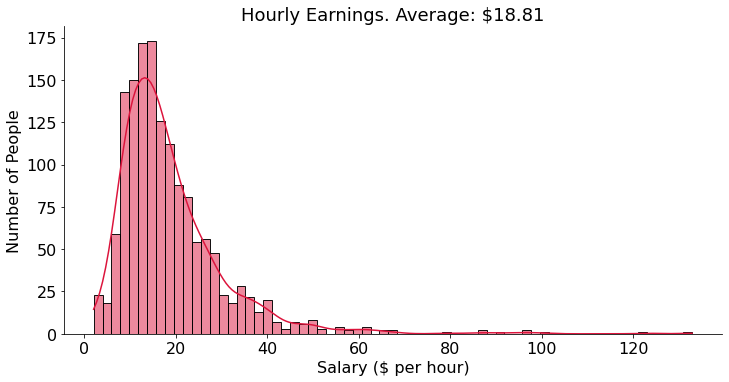

In [66]:
sns.displot(data=df_sub,
            x="EARNINGS",
            kde=True,
            aspect=2,
            color="crimson")


plt.title(label=f"Hourly Earnings. Average: ${(df_sub.EARNINGS.mean()):.4}", fontsize=18)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xlabel(xlabel="Salary ($ per hour)", fontsize=16)
plt.ylabel(ylabel="Number of People", fontsize=16)

plt.show()

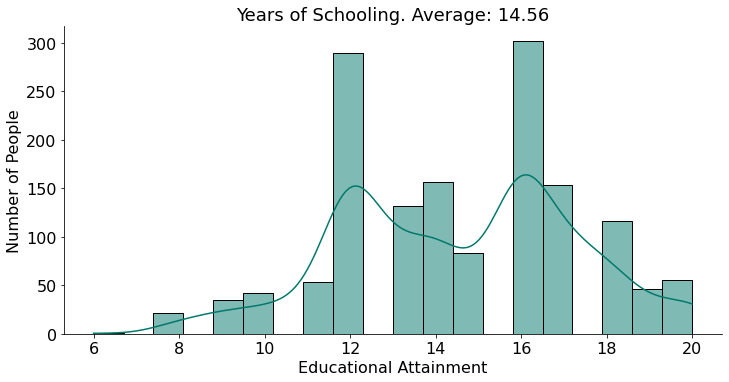

In [63]:
sns.displot(data=df_sub,
            x="S",
            kde=True,
            aspect=2,
            color="#00796b")


plt.title(label=f"Years of Schooling. Average: {(df_sub.S.mean()):.4}", fontsize=18)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xlabel(xlabel="Educational Attainment", fontsize=16)
plt.ylabel(ylabel="Number of People", fontsize=16)

plt.show()

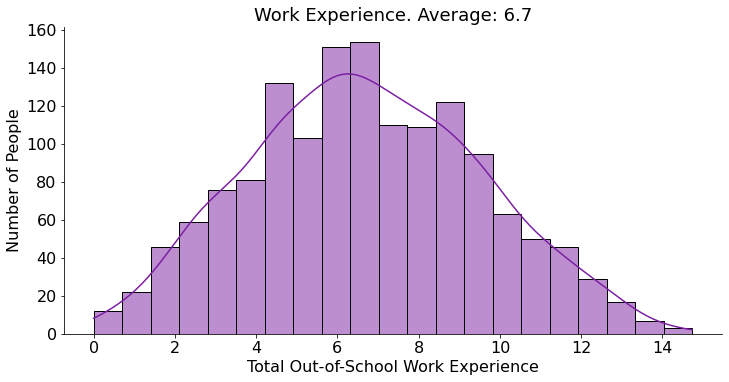

In [64]:
sns.displot(data=df_sub,
            x="EXP",
            kde=True,
            aspect=2,
            color="#7b1fa2")


plt.title(label=f"Work Experience. Average: {(df_sub.EXP.mean()):.4}", fontsize=18)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xlabel(xlabel="Total Out-of-School Work Experience", fontsize=16)
plt.ylabel(ylabel="Number of People", fontsize=16)

plt.show()

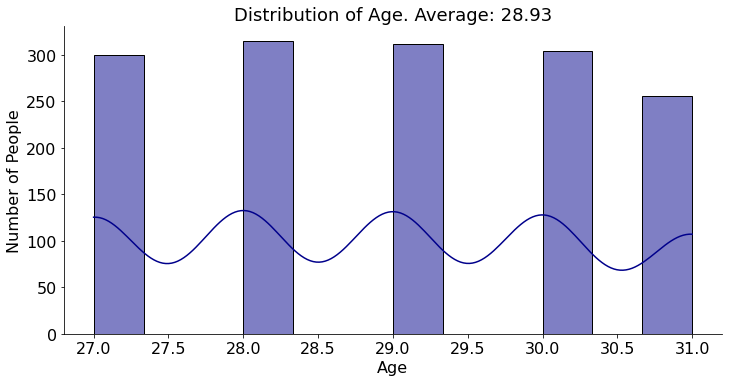

In [65]:
sns.displot(data=df_sub,
            x="AGE",
            kde=True,
            aspect=2,
            color="darkblue")


plt.title(label=f"Distribution of Age. Average: {(df_sub.AGE.mean()):.4}", fontsize=18)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xlabel(xlabel="Age", fontsize=16)
plt.ylabel(ylabel="Number of People", fontsize=16)

plt.show()

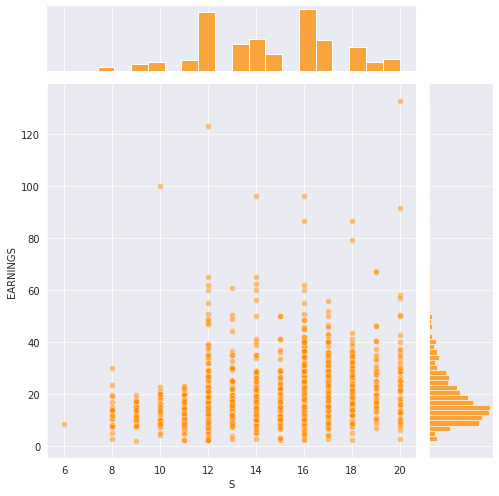

In [78]:
# S vs EARNINGS using Seaborn's jointplot()
with sns.axes_style("darkgrid"):

  sns.jointplot(data=df_sub,
                x="S",
                y="EARNINGS",
                height=7,
                joint_kws={"alpha": 0.5},
                color="darkorange")
  
plt.show()

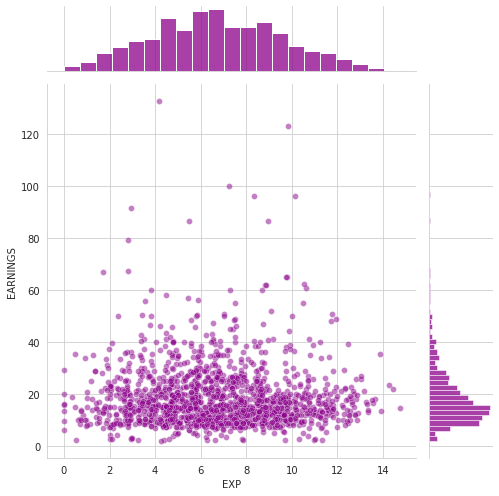

In [80]:
# EXP vs EARNINGS using Seaborn's jointplot()
with sns.axes_style("whitegrid"):

  sns.jointplot(data=df_sub,
                x="EXP",
                y="EARNINGS",
                height=7,
                joint_kws={"alpha": 0.5},
                color="darkmagenta")
  
plt.show()

# Split Training & Test Dataset

We *can't* use all the entries in our dataset to train our model. Keep 20% of the data for later as a testing dataset (out-of-sample data).  

In [56]:
X1 = pd.DataFrame(data=df_sub, columns=["S"])

y1 = pd.DataFrame(data=df_sub, columns=["EARNINGS"])

In [15]:
 X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, 
                                                         train_size=0.8,
                                                         test_size=0.2, 
                                                         random_state=10)

# Simple Linear Regression

Only use the years of schooling to predict earnings. Use sklearn to run the regression on the training dataset. How high is the r-squared for the regression on the training data? 

In [16]:
reg1_train = LinearRegression()
reg1_train.fit(X=X1_train,y=y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
rsquared1_train = reg1_train.score(X=X1_train, y=y1_train)
print(f"Training data r-squared: {rsquared1_train:.1}")

Training data r-squared: 0.08


### Evaluate the Coefficients of the Model

Here we do a sense check on our regression coefficients. The first thing to look for is if the coefficients have the expected sign (positive or negative). 

Interpret the regression. How many extra dollars can one expect to earn for an additional year of schooling?

In [32]:
df_coef1 = pd.DataFrame(data=reg1_train.coef_, index=X1_train.columns, 
                       columns=["Coefficient"])
df_coef1

,Coefficient
S,1.22


In [33]:
extra_earn1 = df_coef1.loc["S"].values[0]
print(f"The amount of extra dollars one can expect to earn for an additional year of schooling is ${extra_earn1:.3}")

The amount of extra dollars one can expect to earn for an additional year of schooling is $1.22


### Analyse the Estimated Values & Regression Residuals

How good our regression is also depends on the residuals - the difference between the model's predictions ( 𝑦̂ 𝑖 ) and the true values ( 𝑦𝑖 ) inside y_train. Do you see any patterns in the distribution of the residuals?

In [38]:
predicted_values1 = reg1_train.predict(X=X1_train)
residuals1 = y1_train - predicted_values1

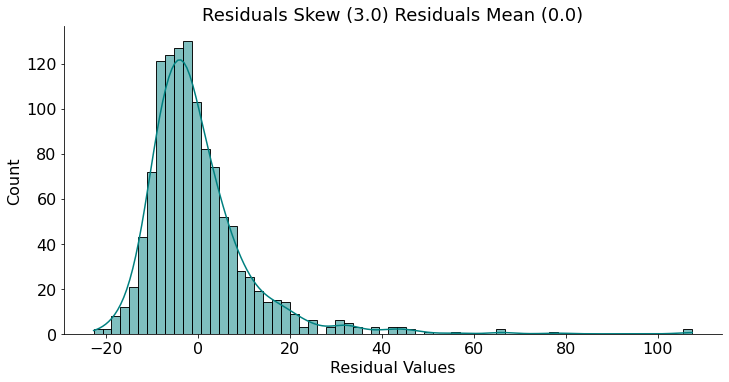

In [47]:
# Residual Distribution Chart
resid_mean1 = round(residuals1.mean().values[0], 2)
resid_skew1 = round(residuals1.skew().values[0], 2)

sns.displot(data=residuals1,
            x="EARNINGS",
            kde=True, 
            color="teal",
            aspect=2)

plt.title(label=f"Residuals Skew ({resid_skew1}) Residuals Mean ({resid_mean1})", fontsize=18)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xlabel(xlabel="Residual Values", fontsize=16)
plt.ylabel(ylabel="Count", fontsize=16)

plt.show()

In [ ]:
# Observing the chart above there is indeed a pattern in the distribution of 
# the residuals.....the distribution is noy symmetrical because the bell curve 
# is biased to the left side

# Multivariable Regression

Now use both years of schooling and the years work experience to predict earnings. How high is the r-squared for the regression on the training data? 

In [65]:
X2 = pd.DataFrame(data=df_sub, columns=["S", "EXP"])

y2 = pd.DataFrame(data=df_sub, columns=["EARNINGS"])

In [66]:
 X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, 
                                                         train_size=0.8,
                                                         test_size=0.2, 
                                                         random_state=10)

In [67]:
reg2_train = LinearRegression()
reg2_train.fit(X=X2_train,y=y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [68]:
rsquared2_train = reg2_train.score(X=X2_train, y=y2_train)
print(f"Training data r-squared: {rsquared2_train:.1}")

Training data r-squared: 0.1


### Evaluate the Coefficients of the Model

In [71]:
df_coef2 = pd.DataFrame(data=reg2_train.coef_.reshape(2, 1), index=X2_train.columns, 
                       columns=["Coefficients"])
df_coef2

,Coefficients
S,1.79
EXP,0.98


### Analyse the Estimated Values & Regression Residuals

In [72]:
predicted_values2 = reg2_train.predict(X=X2_train)
residuals2 = y2_train - predicted_values2

[Text(0, 0.5, 'Predicted Earnings ŷᵢ'), Text(0.5, 0, 'Actual Earnings yᵢ')]

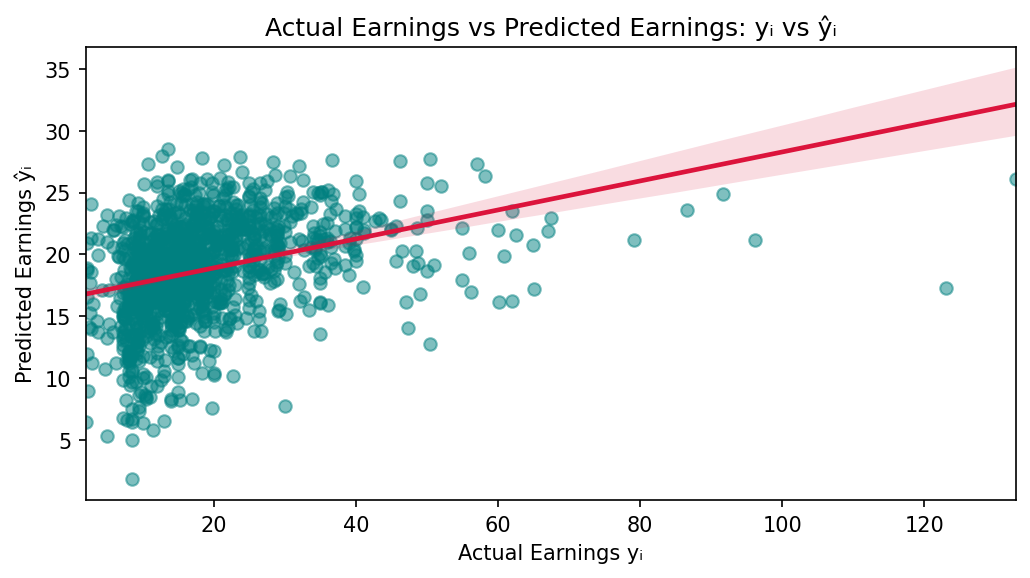

In [76]:
# Original Regression of Actual vs. Predicted Earnings
plt.figure(figsize=(8,4), dpi=150)
plt.title(label="Actual Earnings vs Predicted Earnings: yᵢ vs ŷᵢ")

ax = sns.regplot(x=y2_train, 
                 y=predicted_values2,
                 scatter_kws = {"alpha": 0.5, "color": "teal"},
                 line_kws = {"color": "crimson"})

ax.set(ylabel="Predicted Earnings ŷᵢ",
       xlabel="Actual Earnings yᵢ")

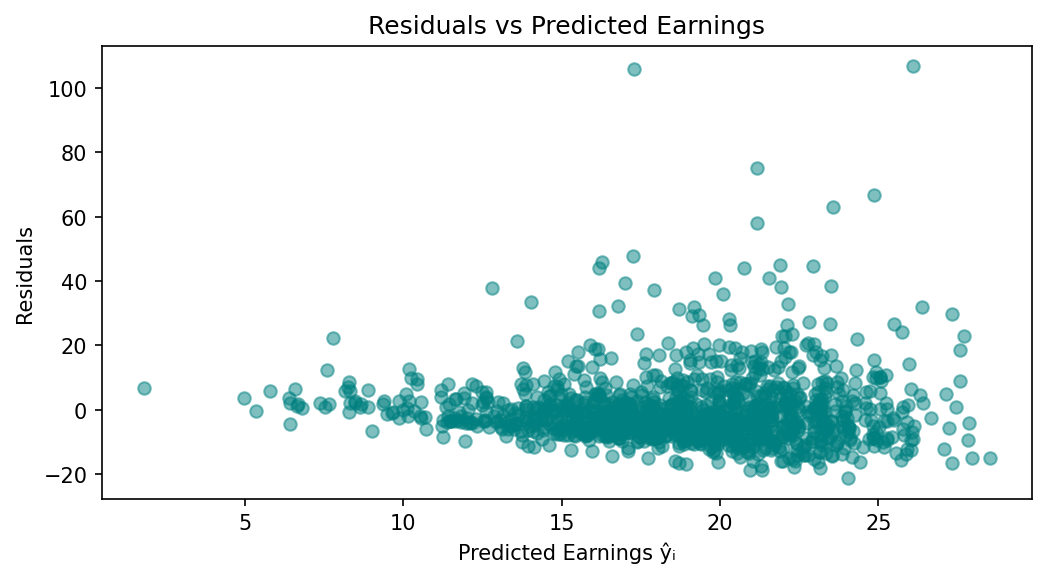

In [159]:
# Residuals vs Predicted values
plt.figure(figsize=(8,4), dpi=150)
plt.title("Residuals vs Predicted Earnings", fontsize=12)

plt.scatter(x=predicted_values2, y=residuals2, c="teal", alpha=0.5)
plt.xlabel("Predicted Earnings ŷᵢ", fontsize=10)
plt.ylabel("Residuals", fontsize=10)

plt.show()

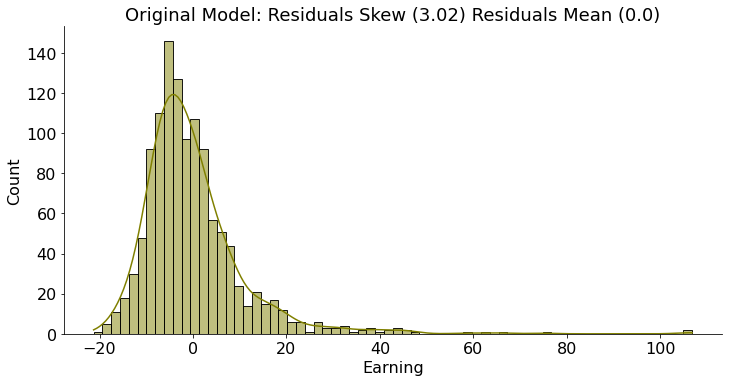

In [108]:
# Residual Distribution Chart
resid_mean2 = round(residuals2.mean().values[0], 2)
resid_skew2 = round(residuals2.skew().values[0], 2)

sns.displot(data=residuals2,
            x="EARNINGS",
            kde=True, 
            color="olive",
            aspect=2)

plt.title(label=f"Original Model: Residuals Skew ({resid_skew2}) Residuals Mean ({resid_mean2})", fontsize=18)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xlabel(xlabel="Earning", fontsize=16)
plt.ylabel(ylabel="Count", fontsize=16)

plt.show()

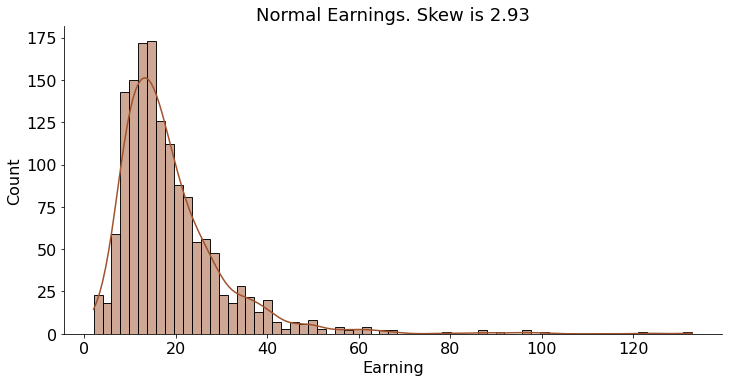

In [100]:
# Investigating to see if the target df_sub.EARNINGS is a suitable candidate 
# for log transformation to make the data fit in better with my linear model
sns.displot(data=df_sub,
            x="EARNINGS",
            kde=True,
            aspect=2,
            color="sienna")

plt.title(label=f"Normal Earnings. Skew is {df_sub.EARNINGS.skew():.3}", fontsize=18)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xlabel(xlabel="Earning", fontsize=16)
plt.ylabel(ylabel="Count", fontsize=16)

plt.show()

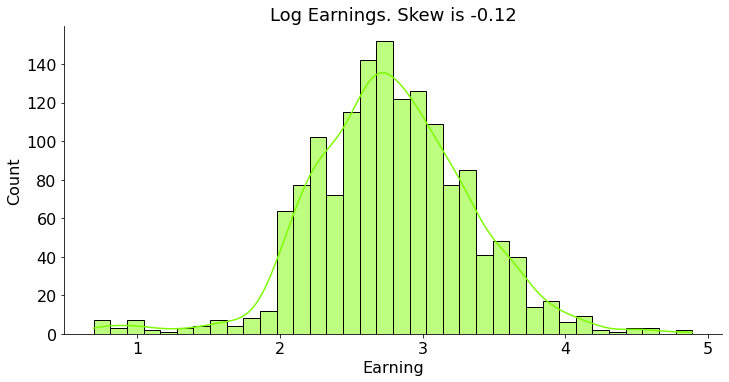

In [98]:
log_earnings = np.log(df_sub.EARNINGS)

sns.displot(data=log_earnings,
            kde=True,
            aspect=2,
            color="lawngreen")

plt.title(label=f"Log Earnings. Skew is {log_earnings.skew():.2}", fontsize=18)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xlabel(xlabel="Earning", fontsize=16)
plt.ylabel(ylabel="Count", fontsize=16)

plt.show()

In [95]:
# Improving the model
y2_log = pd.DataFrame(data=log_earnings)

X2_log_train, X2_log_test, y2_log_train, y2_log_test = train_test_split(X2, y2_log, train_size=0.8, test_size=0.2, random_state=10)

In [96]:
reg2_log_train = LinearRegression()
reg2_log_train.fit(X2_log_train, y2_log_train)
rsquared2_log = reg2_log_train.score(X2_log_train, y2_log_train)

print(f'Training data r-squared: {rsquared2_log:.2}')

Training data r-squared: 0.16


In [101]:
df_coef2_log = pd.DataFrame(data=reg2_log_train.coef_.reshape(2, 1), 
                            index=X2_log_train.columns, 
                            columns=["Coefficients"])
df_coef2_log

,Coefficients
S,0.10
EXP,0.06


In [103]:
predicted_values2_log = reg2_log_train.predict(X=X2_log_train)
residuals2_log = y2_log_train - predicted_values2_log

[Text(0, 0.5, 'Predicted Log Earnings ŷᵢ'),
 Text(0.5, 0, 'Actual Log Earnings yᵢ')]

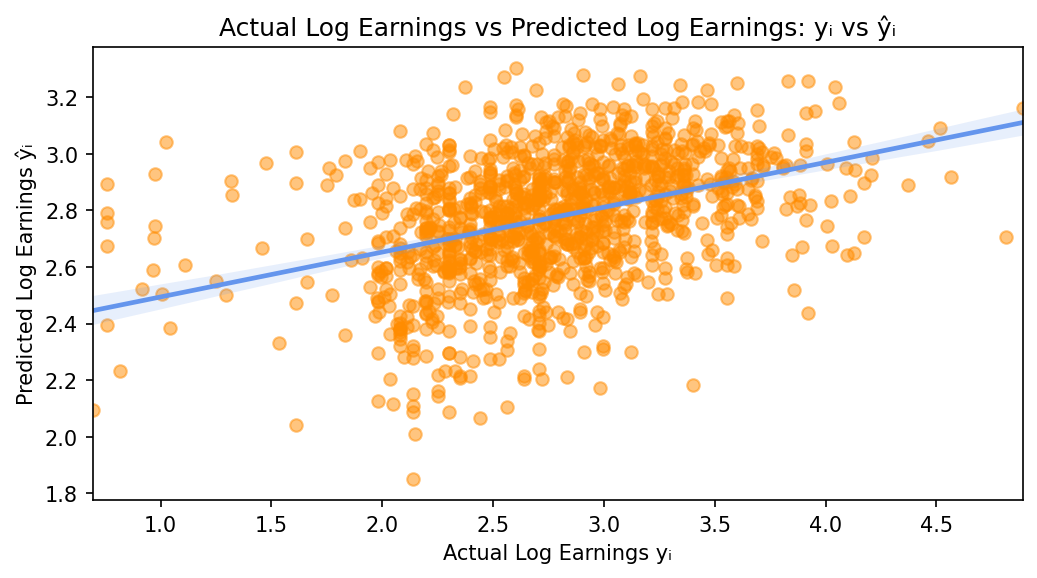

In [166]:
# Original Regression of Actual vs. Predicted Log Earnings
plt.figure(figsize=(8,4), dpi=150)
plt.title(label="Actual Log Earnings vs Predicted Log Earnings: yᵢ vs ŷᵢ")

ax = sns.regplot(x=y2_log_train, 
                 y=predicted_values2_log,
                 scatter_kws = {"alpha": 0.5, "color": "darkorange"},
                 line_kws = {"color": "cornflowerblue"})

ax.set(ylabel="Predicted Log Earnings ŷᵢ",
       xlabel="Actual Log Earnings yᵢ")

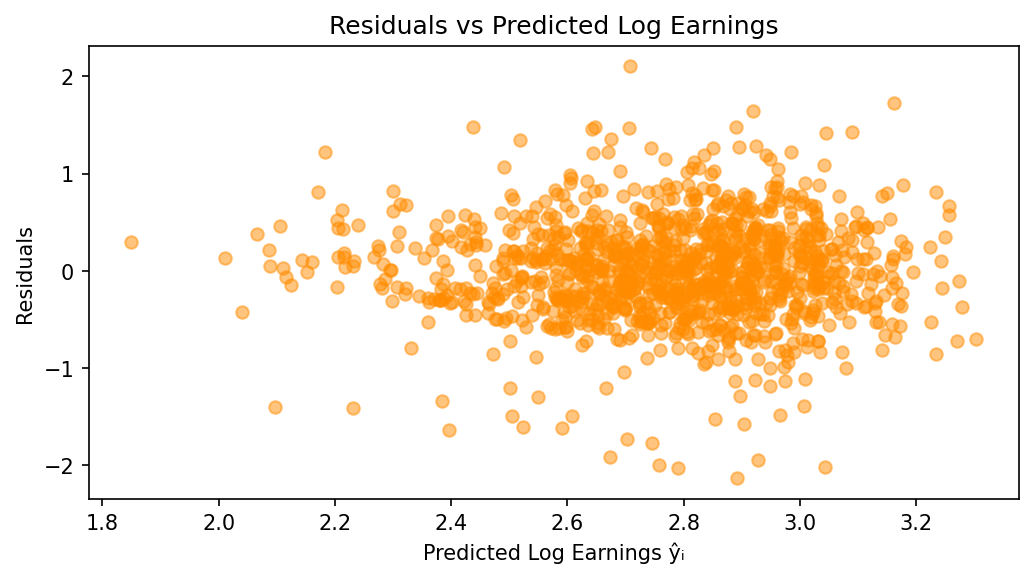

In [167]:
# Residuals vs Predicted Log Earnings
plt.figure(figsize=(8,4), dpi=150)
plt.title("Residuals vs Predicted Log Earnings", fontsize=12)

plt.scatter(x=predicted_values2_log, y=residuals2_log, c="darkorange", alpha=0.5)
plt.xlabel("Predicted Log Earnings ŷᵢ", fontsize=10)
plt.ylabel("Residuals", fontsize=10)

plt.show()

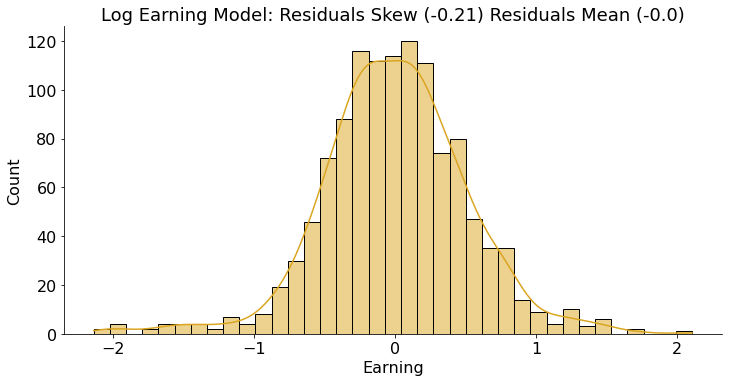

In [107]:
# Distribution of Residuals (log earnings) - checking for normality
log_resid_mean2 = round(residuals2_log.mean().values[0], 2)
log_resid_skew2 = round(residuals2_log.skew().values[0], 2)

sns.displot(data=residuals2_log,
            x="EARNINGS",
            kde=True, 
            color="goldenrod",
            aspect=2)

plt.title(label=f"Log Earning Model: Residuals Skew ({log_resid_skew2}) Residuals Mean ({log_resid_mean2})", fontsize=18)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xlabel(xlabel="Earning", fontsize=16)
plt.ylabel(ylabel="Count", fontsize=16)

plt.show()

In [109]:
# Comparing out-of-sample performance
print(f"Original Model Test Data r-squared: {reg2_train.score(X=X2_test, y=y2_test):.2}")
print()

print(f"Log Model Test Data r-squared: {reg2_log_train.score(X=X2_log_test, y=y2_log_test):.2}")

Original Model Test Data r-squared: 0.087

Log Model Test Data r-squared: 0.15


# Use Your Model to Make a Prediction

How much can someone with a bachelors degree (12 + 4) years of schooling and 5 years work experience expect to earn in 2011?

In [113]:
X2.head()  # features

,S,EXP
0,12,9.71
1,17,5.71
2,14,9.94
3,18,1.54
4,15,2.94


My preferred model now has an equation that looks like this:

$$ \log (EAR \hat NINGS) = \theta _0 + \theta _1 S + \theta _2 EXP $$

In [114]:
# Starting Point: Average Values in the Dataset
average_vals = X2.mean().values
explanatory_variables = pd.DataFrame(data=average_vals.reshape(1, len(X2.columns)), 
                                     columns=X2.columns)
explanatory_variables

,S,EXP
0,14.56,6.70


In [121]:
# Set Earning Characteristics
explanatory_variables.S = 16
explanatory_variables.EXP = 5

In [123]:
# Make a prediction of the response variable
log_estimate = reg2_log_train.predict(explanatory_variables)[0][0]
print(f"The log earning estimate is ${log_estimate:.3}")
print()

# Convert Log Earnings to Acutal Dollar Values
dollar_est = np.exp(log_estimate)
print(f"Someone with a bachelors degree, 16 years of schooling and 5 years "
      f"work\nexperience will expect to earn an estimate of ${dollar_est:.4} "
      f"per hour in 2011")

The log earning estimate is $2.82

Someone with a bachelors degree, 16 years of schooling and 5 years work
experience will expect to earn an estimate of $16.77 per hour in 2011


# Experiment and Investigate Further

Which other features could you consider adding to further improve the regression to better predict earnings? 

In [146]:
# Adding 4 new features to further improve the regression to better predict earnings
X3 = pd.DataFrame(data=df_sub, columns=["S", "EXP", "AGE", "HEIGHT", "WEIGHT04", "HOURS"])

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y2_log, 
                                                        train_size=0.8,
                                                        test_size=0.2, 
                                                        random_state=10)

In [168]:
X3.head()  # features

,S,EXP,AGE,HEIGHT,WEIGHT04,HOURS
0,12,9.71,27,70,155,50
1,17,5.71,29,74,200,50
2,14,9.94,30,72,168,65
3,18,1.54,28,73,153,40
4,15,2.94,27,71,145,40


In [147]:
regr3 = LinearRegression()
regr3.fit(X=X3_train,y=y3_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [151]:
rsquared3 = regr3.score(X=X3_train, y=y3_train)
print(f"Training data r-squared: {rsquared3:.2}")

Training data r-squared: 0.21


In [152]:
df_coef3 = pd.DataFrame(data=regr3.coef_.reshape(6, 1), index=X3_train.columns, 
                       columns=["Coefficients"])
df_coef3

,Coefficients
S,0.10
EXP,0.06
AGE,-0.03
HEIGHT,0.02
WEIGHT04,-0.00
HOURS,0.01


In [153]:
predicted_values3 = regr3.predict(X=X3_train)
residuals3 = y3_train - predicted_values3

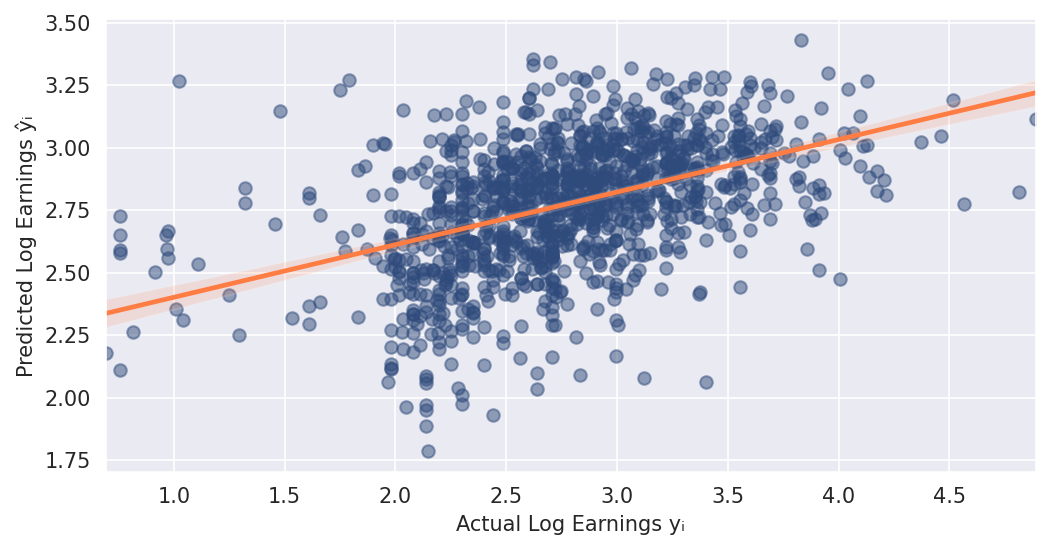

In [155]:
# Original Regression of Actual vs. Predicted Log Earnings
plt.figure(figsize=(8,4), dpi=150)

with sns.axes_style("darkgrid"):
  ax = sns.regplot(x=y3_train, 
                   y=predicted_values3,
                   scatter_kws = {"alpha": 0.5, "color": "#2f4b7c"},
                   line_kws = {"color": "#ff7c43"})

  ax.set(ylabel="Predicted Log Earnings ŷᵢ",
         xlabel="Actual Log Earnings yᵢ")

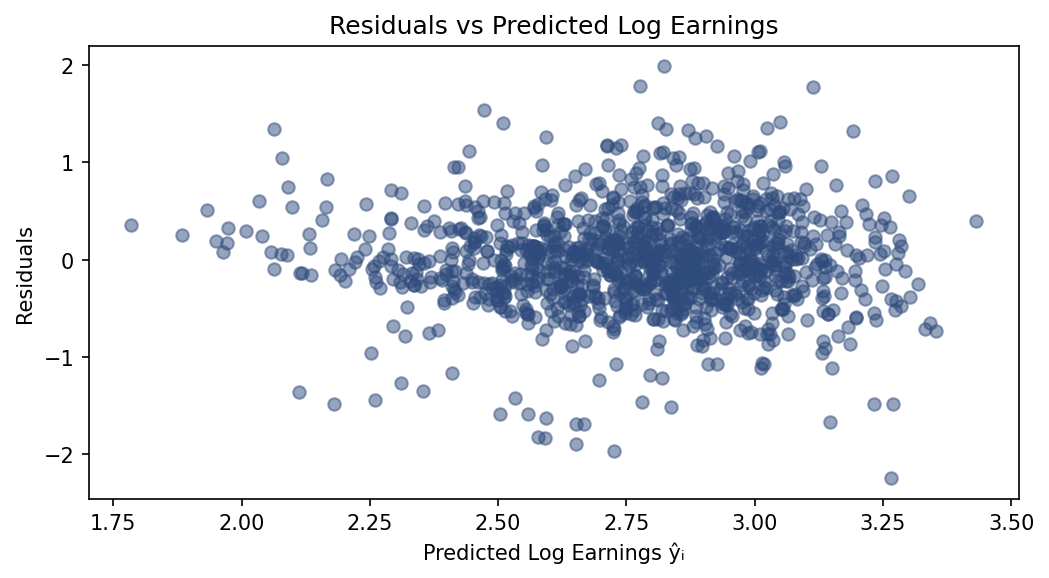

In [157]:
# Residuals vs Predicted Log Earnings
plt.figure(figsize=(8,4), dpi=150)
plt.title("Residuals vs Predicted Log Earnings", fontsize=12)

plt.scatter(x=predicted_values3, y=residuals3, c="#2f4b7c", alpha=0.5)
plt.xlabel("Predicted Log Earnings ŷᵢ", fontsize=10)
plt.ylabel("Residuals", fontsize=10)

plt.show()

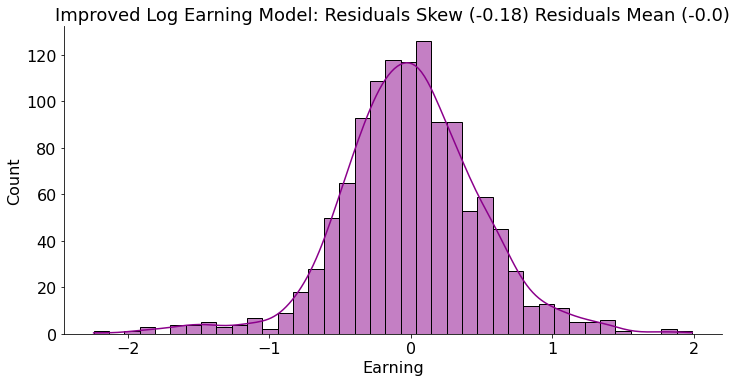

In [169]:
# Distribution of Residuals (improved log earnings) - checking for normality
resid_mean3 = round(residuals3.mean().values[0], 2)
resid_skew3 = round(residuals3.skew().values[0], 2)

sns.displot(data=residuals3,
            x="EARNINGS",
            kde=True, 
            color="darkmagenta",
            aspect=2)

plt.title(label=f"Improved Log Earning Model: Residuals Skew ({resid_skew3}) Residuals Mean ({resid_mean3})", fontsize=18)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xlabel(xlabel="Earning", fontsize=16)
plt.ylabel(ylabel="Count", fontsize=16)

plt.show()

In [170]:
# Comparing out-of-sample performance
print(f"Original Model Test Data r-squared: {reg2_train.score(X=X2_test, y=y2_test):.2}")
print()

print(f"Log Model Test Data r-squared: {reg2_log_train.score(X=X2_log_test, y=y2_log_test):.2}")
print()

print(f"Improved Log Model Test Data r-squared: {regr3.score(X=X3_test, y=y3_test):.2}")

Original Model Test Data r-squared: 0.087

Log Model Test Data r-squared: 0.15

Improved Log Model Test Data r-squared: 0.18


My preferred model now has an equation that looks like this:

$$ \log (EAR \hat NINGS) = \theta _0 + \theta _1 S + \theta _2 EXP + \theta _3 AGE + \theta _4 HEIGHT + \theta _5 WEIGHT04 + \theta _6 HOURS $$

In [172]:
# Starting Point: Average Values in the Improved Dataset
average_vals2 = X3.mean().values
explanatory_variables2 = pd.DataFrame(data=average_vals2.reshape(1, len(X3.columns)), 
                                     columns=X3.columns)
explanatory_variables2


,S,EXP,AGE,HEIGHT,WEIGHT04,HOURS
0,14.56,6.70,28.93,68.02,168.49,39.10


In [173]:
# Set Earning Characteristics
explanatory_variables2.S = 16
explanatory_variables2.EXP = 5

In [174]:
# Use the improved regression model to predict the response variable
log_estimate2 = regr3.predict(explanatory_variables2)[0][0]
print(f"The log earning estimate is ${log_estimate2:.3}")
print()

# Convert Log Earnings to Acutal Dollar Values
dollar_est2 = np.exp(log_estimate2)
print(f"Someone with a bachelors degree, 16 years of schooling and 5 years "
      f"work\nexperience will expect to earn an estimate of ${dollar_est2:.4} "
      f"per hour in 2011")

The log earning estimate is $2.82

Someone with a bachelors degree, 16 years of schooling and 5 years work
experience will expect to earn an estimate of $16.71 per hour in 2011
